계단함수

In [2]:
import numpy as np

def step_function(x):
    y=x>0
    return y.astype(np.int)

In [3]:
x= np.array([-0.1, 1.0, 2.0])
x

array([-0.1,  1. ,  2. ])

In [5]:
y = x>0
y

array([False,  True,  True])

In [15]:
y= y.astype(np.int64)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

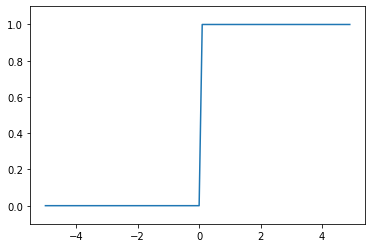

In [16]:
import matplotlib.pylab as plt
def step_function(x):
    return np.array(x>0,dtype=np.int64)
x=np.arange(-5.0, 5.0, 0.1)
y=step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

Sigmoid

In [17]:
def sigmoid(x):
    return 1/ (1+np.exp(-x))

In [18]:
x= np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [22]:
t = np.array([1.0,2.0,3.0])
1.0+t
#브로드 캐스트

array([2., 3., 4.])

In [23]:
1.0/t

array([1.        , 0.5       , 0.33333333])

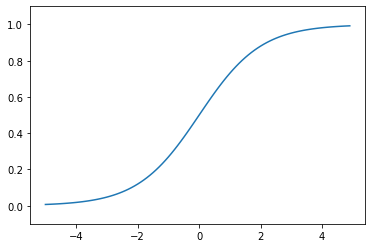

In [26]:
x=np.arange(-5.0, 5.0, 0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

부드러운 시그모이드 함수

Relu

In [29]:
def relu(x):
    return np.maximum(0, x)

In [35]:
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A)) # 배열의 차원
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [31]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [33]:
np.ndim(B)

2

In [34]:
B.shape

(3, 2)

행렬의 곱

In [37]:
A = np.array([[1,2], [3,4]])
A.shape

(2, 2)

In [39]:
B= np.array([[5,6],[7,8]])

np.dot(A, B) #행곱

array([[19, 22],
       [43, 50]])

In [40]:
A = np.array([[1,2,3], [4,5,6]])
B=np.array([[1,2], [3,4], [5,6]])

np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [41]:
C = np.array([[1,2], [3,4]])

np.dot(A, C)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [42]:
A = np.array([[1,2],[3,4],[5,6]])
B=np.array([7,8])
np.dot(A, B)

array([23, 53, 83])

In [43]:
X = np.array([1.0,0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [44]:
A1

array([0.3, 0.7, 1.1])

In [45]:
Z1 = sigmoid(A1)

In [46]:
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [47]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3,0.6]])
B2 = np.array([0.1,0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2= np.dot(Z1, W2) + B2
Z2= sigmoid(A2)

(3,)
(3, 2)
(2,)


In [49]:
def identity_function(x):
    return x
W3 = np.array([[0.1,0.3], [0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

init_network()는 가중치와 편향을 초기화하고 딕셔너리 network에 저장  
forward는 입력 신호를 출력으로 변환하는 처리 과정을 구현

In [51]:
def init_network():
    network={}
    network['W1']= np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1,0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) +b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y= identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)
                                        
                        

[0.31682708 0.69627909]


# 출력층 설계하기  
분류: 식모, 솦맥  
회귀: 항등

소프트맥스 함수의 출력은 모든 입력 신호로부터 영향을 받음  

In [52]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [53]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [54]:
y = exp_a/sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [55]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

솦맥 구현 시 주의점: 오버플로 문제(지수)

In [56]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

C:\Users\phs51\AppData\Local\Temp\ipykernel_3928\832863605.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
C:\Users\phs51\AppData\Local\Temp\ipykernel_3928\832863605.py:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [57]:
c = np.max(a)

In [58]:
a-c

array([  0, -10, -20])

In [59]:
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [62]:
def softmax(a):
    c= np.max(a)
    exp_a = np.exp(a-c) #오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y=exp_a/sum_exp_a
    return y

In [63]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [64]:
np.sum(y)

1.0

여기서 알 수 있는 점: 솦맥의 출력의 합은 1.0으로 각각의 출력은 확률로 볼 수 있따.

+ 출력층에서는 솦맥 생략 (돈)

# 추론과정 (신경망의 순전파)

In [65]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

ModuleNotFoundError: No module named 'dataset'

링크가 죽음

In [66]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.unit8(img))
    pil_img.show()
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

ModuleNotFoundError: No module named 'dataset'

In [67]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) +b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [68]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt +=1
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

NameError: name 'load_mnist' is not defined

In [69]:
x, t = get_data()
network = init_network()

batch_size=100
accuracy_cnt = 0
for i in range(0,len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt+=np.sum(p==t[i:i+batch_size])
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

NameError: name 'load_mnist' is not defined

끝  
다음에 수정함